In [535]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [536]:
data=pd.read_csv('train.csv')

In [537]:
data_test=pd.read_csv('test.csv')

In [538]:
data_test.shape

(1459, 80)

In [539]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [540]:
data_test['GarageYrBlt']

0       1961.0
1       1958.0
2       1997.0
3       1998.0
4       1992.0
         ...  
1454       NaN
1455    1970.0
1456    1960.0
1457       NaN
1458    1993.0
Name: GarageYrBlt, Length: 1459, dtype: float64

In [541]:
data_test.shape

(1459, 80)

In [542]:
columns_with_na=[features for features in data.columns if data[features].isnull().sum()>1]

In [543]:
columns_with_na_test=[features for features in data_test.columns if data_test[features].isnull().sum()>1]

In [544]:
for feature in columns_with_na:
    print(feature,np.round(data[feature].isnull().mean(),2)*100, '% of missing values')

LotFrontage 18.0 % of missing values
Alley 94.0 % of missing values
MasVnrType 1.0 % of missing values
MasVnrArea 1.0 % of missing values
BsmtQual 3.0 % of missing values
BsmtCond 3.0 % of missing values
BsmtExposure 3.0 % of missing values
BsmtFinType1 3.0 % of missing values
BsmtFinType2 3.0 % of missing values
FireplaceQu 47.0 % of missing values
GarageType 6.0 % of missing values
GarageYrBlt 6.0 % of missing values
GarageFinish 6.0 % of missing values
GarageQual 6.0 % of missing values
GarageCond 6.0 % of missing values
PoolQC 100.0 % of missing values
Fence 81.0 % of missing values
MiscFeature 96.0 % of missing values


In [545]:
for feature in columns_with_na_test:
    print(feature,np.round(data_test[feature].isnull().mean(),2)*100, '% of missing values')

MSZoning 0.0 % of missing values
LotFrontage 16.0 % of missing values
Alley 93.0 % of missing values
Utilities 0.0 % of missing values
MasVnrType 1.0 % of missing values
MasVnrArea 1.0 % of missing values
BsmtQual 3.0 % of missing values
BsmtCond 3.0 % of missing values
BsmtExposure 3.0 % of missing values
BsmtFinType1 3.0 % of missing values
BsmtFinType2 3.0 % of missing values
BsmtFullBath 0.0 % of missing values
BsmtHalfBath 0.0 % of missing values
Functional 0.0 % of missing values
FireplaceQu 50.0 % of missing values
GarageType 5.0 % of missing values
GarageYrBlt 5.0 % of missing values
GarageFinish 5.0 % of missing values
GarageQual 5.0 % of missing values
GarageCond 5.0 % of missing values
PoolQC 100.0 % of missing values
Fence 80.0 % of missing values
MiscFeature 97.0 % of missing values


In [546]:
columns_num_type=[feature for feature in data.columns if data[feature].dtype!='O']

In [547]:
columns_num_type_test=[feature for feature in data_test.columns if data_test[feature].dtype!='O']

In [548]:
columns_object_type=[feature for feature in data.columns if data[feature].dtype=='O']

In [549]:
columns_object_type_test=[feature for feature in data_test.columns if data_test[feature].dtype=='O']

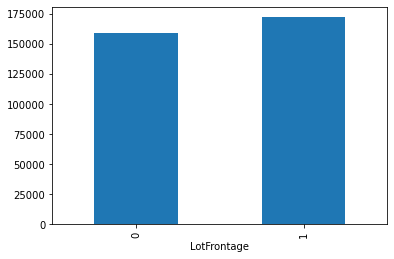

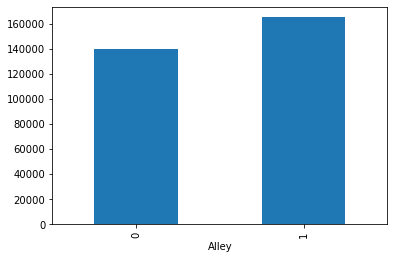

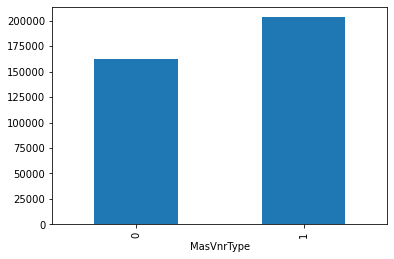

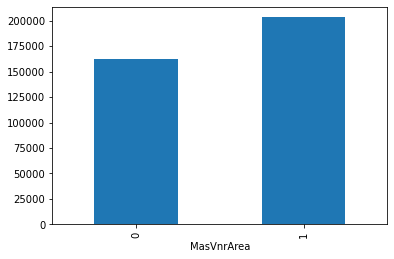

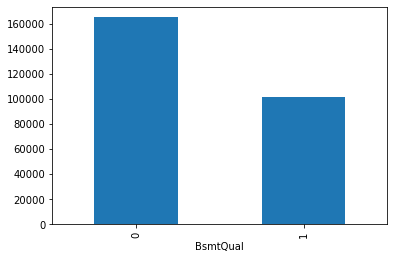

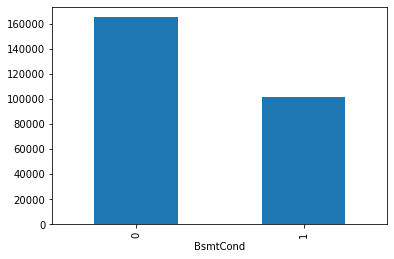

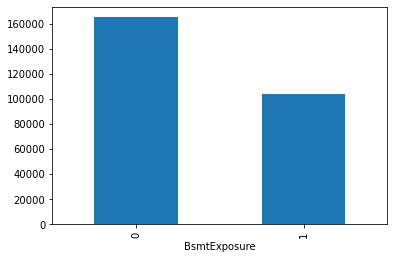

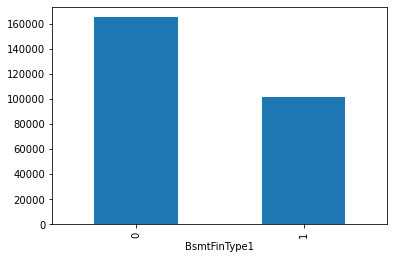

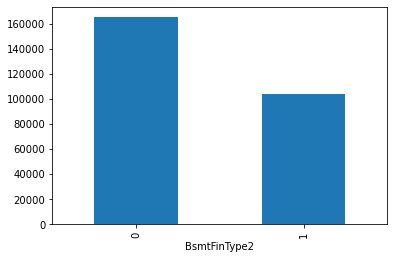

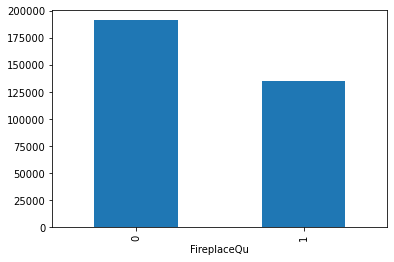

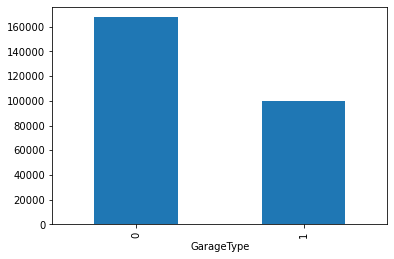

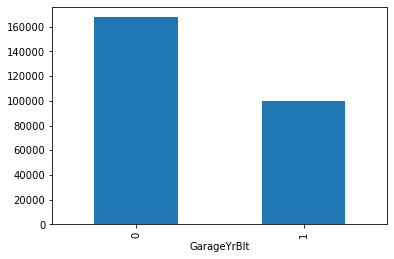

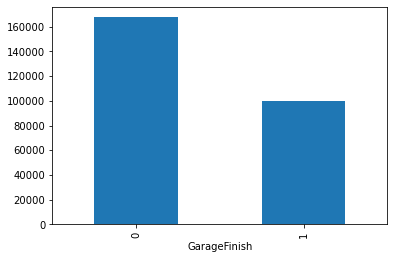

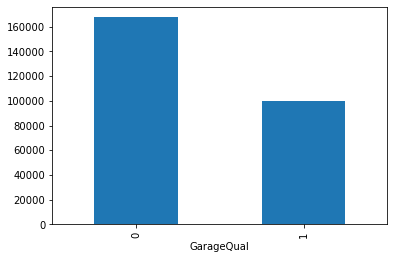

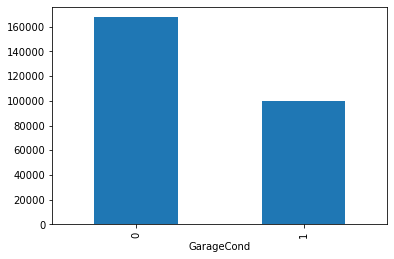

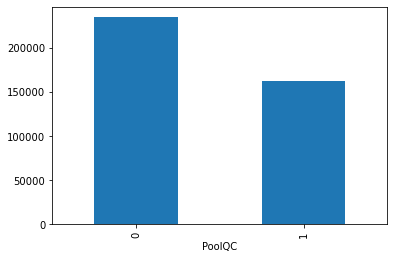

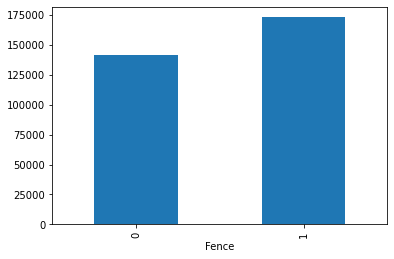

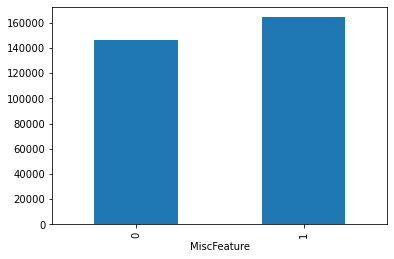

In [550]:
for feature in columns_with_na:
    df=data.copy()
    df[feature]=np.where(df[feature].isnull(),1,0)
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.show()

As we can see that there is relationship between the missing values and the SalePrice that is the independent variable

In [551]:
print("The Total number of Id's are {}".format(len(data['Id'])))

The Total number of Id's are 1460


In [552]:
features_with_date=[feature for feature in data.columns if 'Yr' in feature or 'Year' in feature]

In [553]:
features_with_date_test=[feature for feature in data_test.columns if 'Yr' in feature or 'Year' in feature]

In [554]:
data_test[features_with_date_test]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,1961,1961,1961.0,2010
1,1958,1958,1958.0,2010
2,1997,1998,1997.0,2010
3,1998,1998,1998.0,2010
4,1992,1992,1992.0,2010
...,...,...,...,...
1454,1970,1970,NaN,2006
1455,1970,1970,1970.0,2006
1456,1960,1996,1960.0,2006
1457,1992,1992,NaN,2006


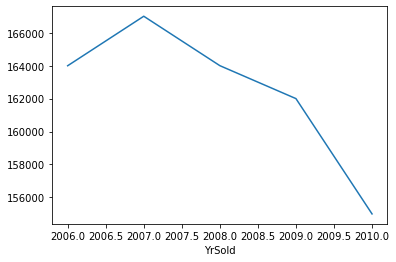

In [555]:
data.groupby('YrSold')['SalePrice'].median().plot()

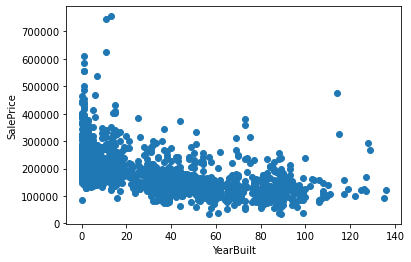

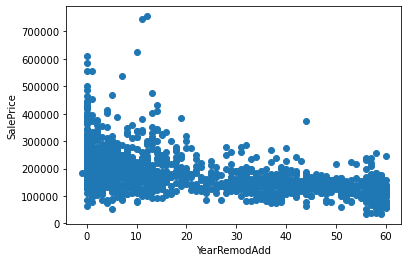

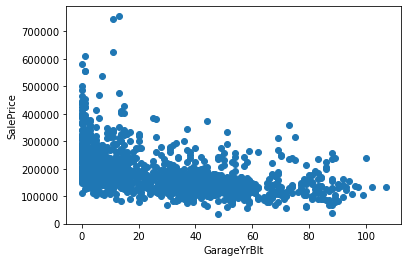

In [556]:
for feature in features_with_date:
    if feature!='YrSold':
        df=data.copy()
        df[feature]=df['YrSold']-df[feature]
        plt.scatter(df[feature],df['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()
        

In [557]:
discrete_feature=[feature for feature in columns_num_type if len(data[feature].unique())<25 and feature not in features_with_date + ['Id']]

In [558]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

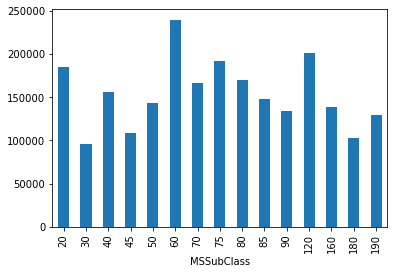

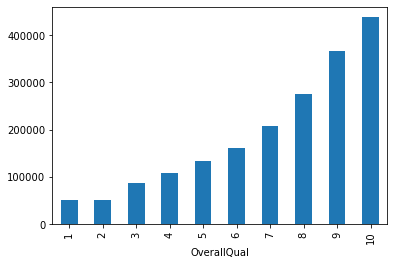

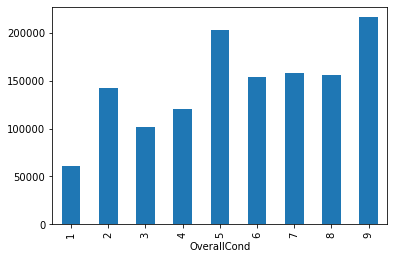

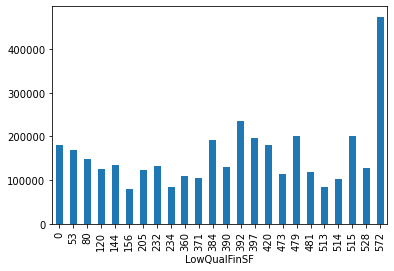

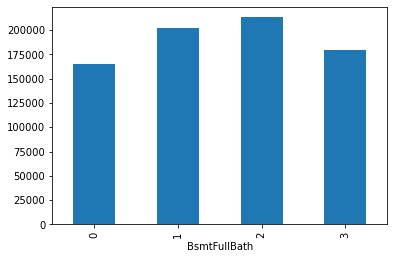

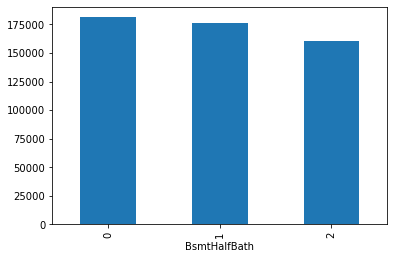

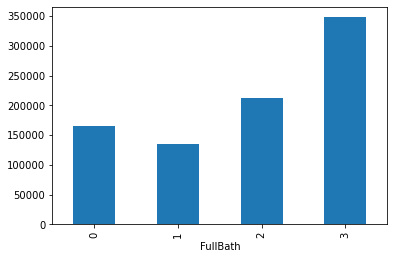

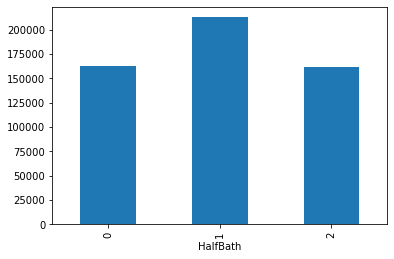

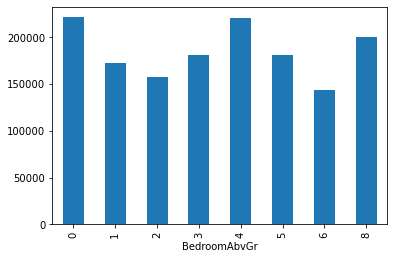

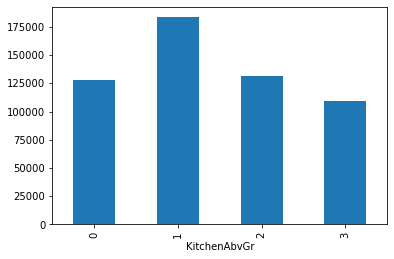

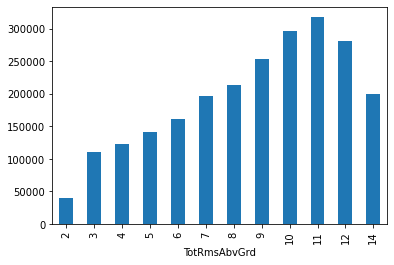

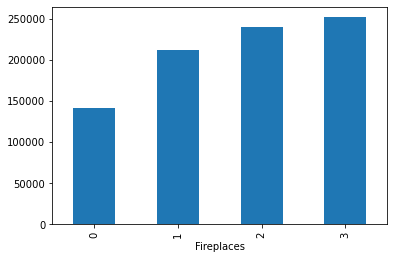

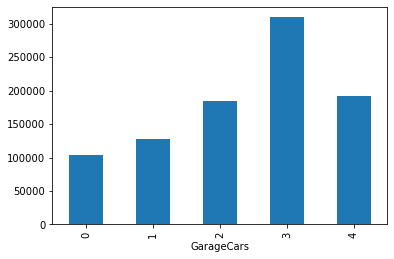

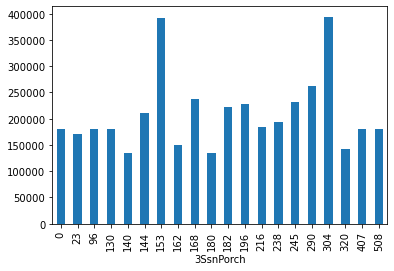

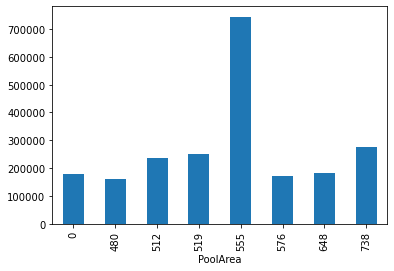

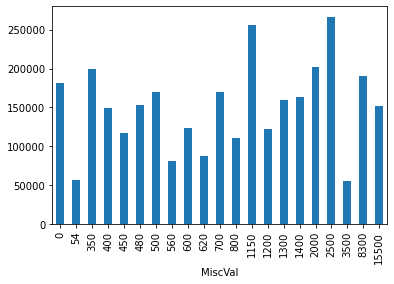

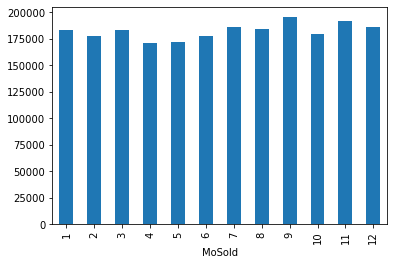

In [559]:
for feature in discrete_feature:
    data.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.xlabel(feature)
    plt.show()

In [560]:
continuous_feature=[feature for feature in columns_num_type if feature not in discrete_feature + ['Id'] + features_with_date ]

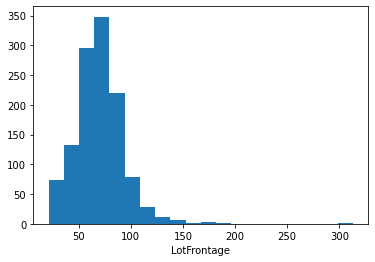

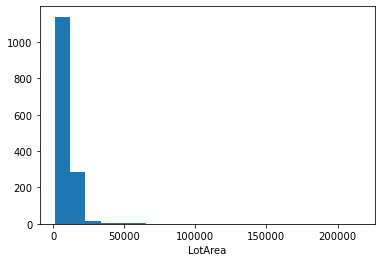

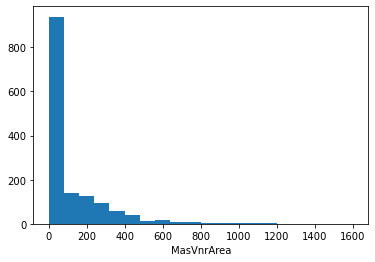

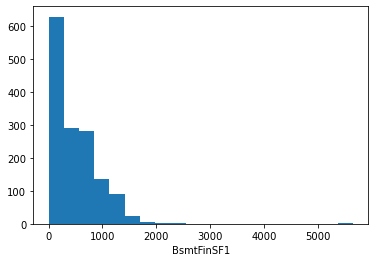

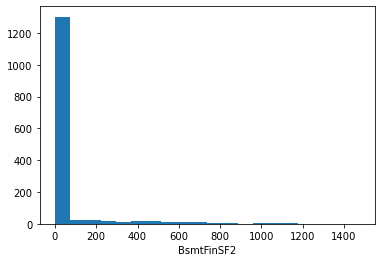

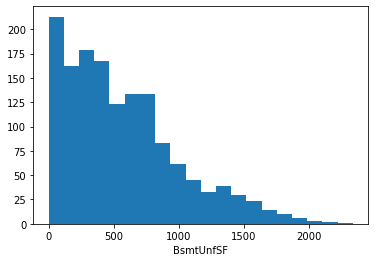

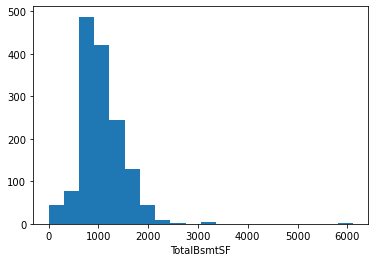

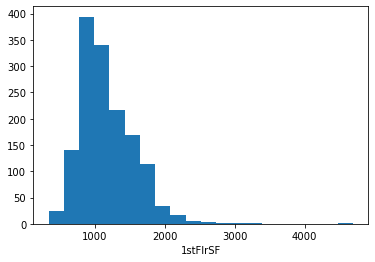

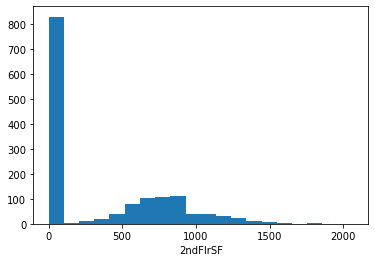

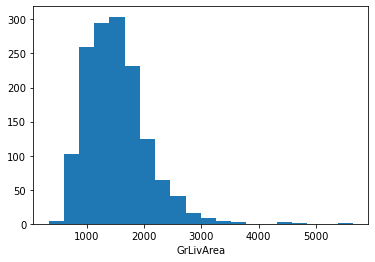

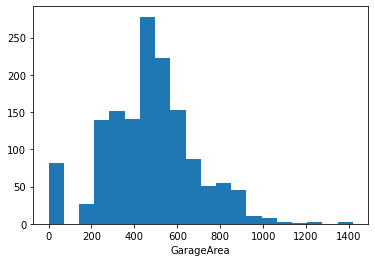

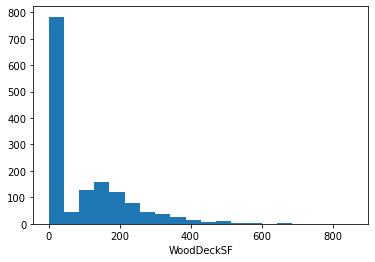

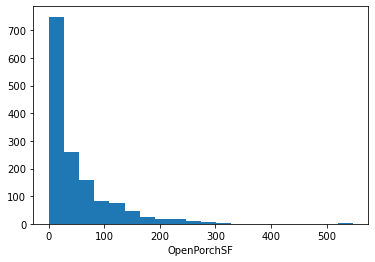

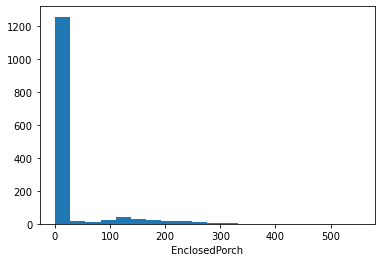

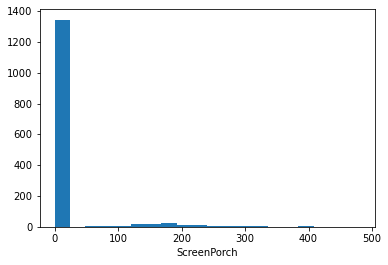

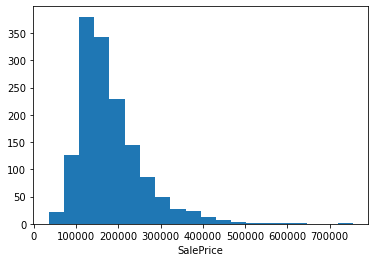

In [561]:
for feature in continuous_feature:
    plt.hist(data[feature],bins=20)
    plt.xlabel(feature)
    plt.show()

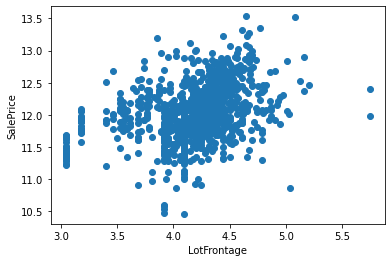

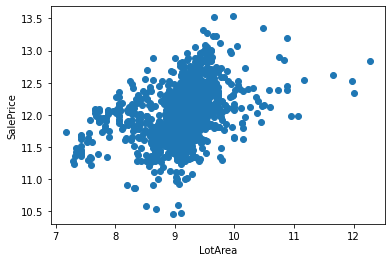

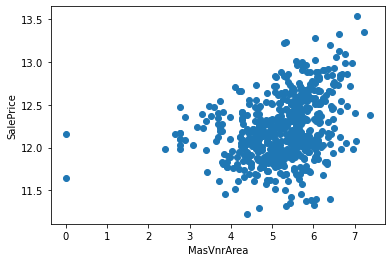

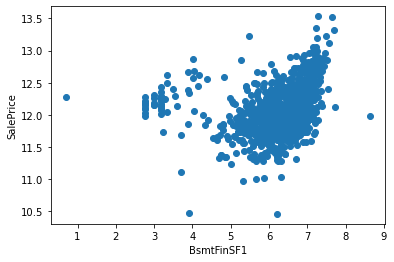

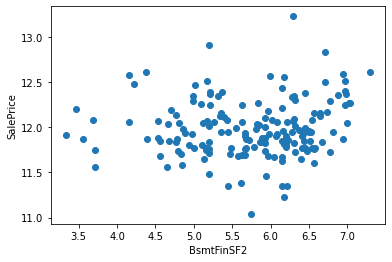

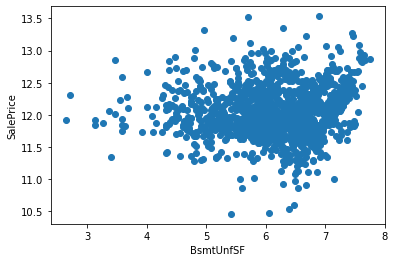

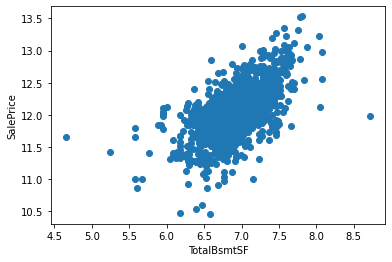

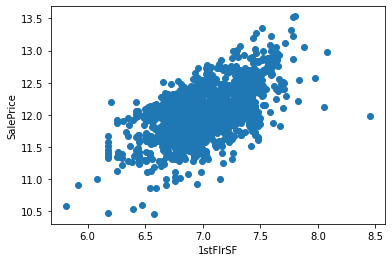

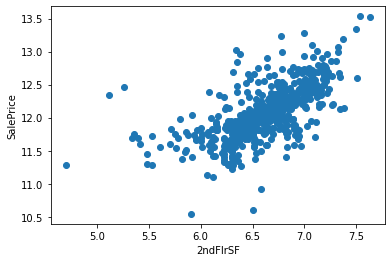

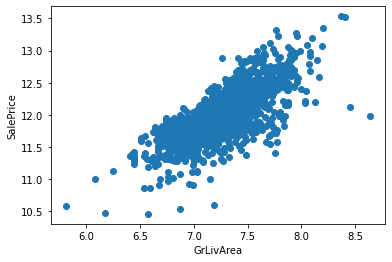

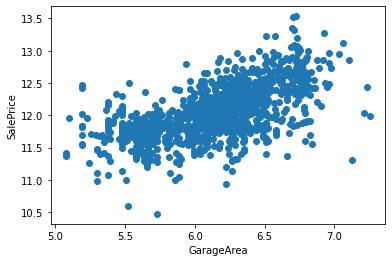

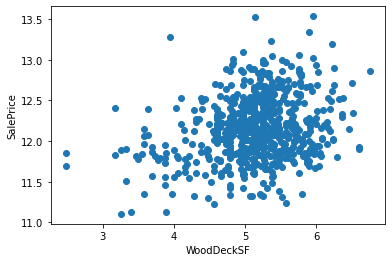

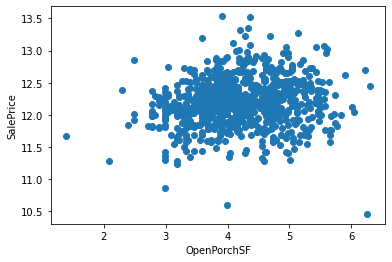

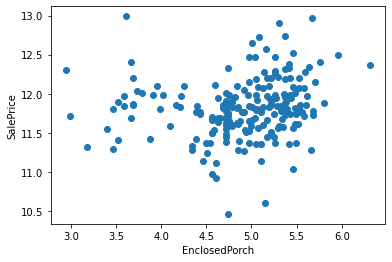

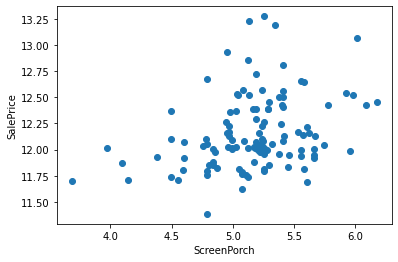

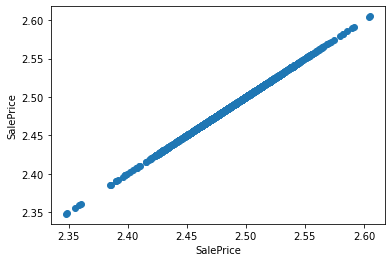

In [562]:
for feature in continuous_feature:
    df=data.copy()
    df[feature]=np.log(df[feature])
    df['SalePrice']=np.log(df['SalePrice'])
    plt.scatter(df[feature],df['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

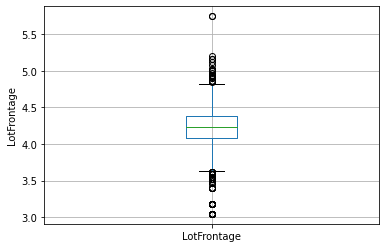

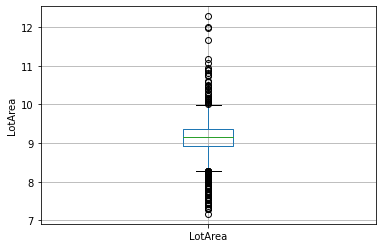

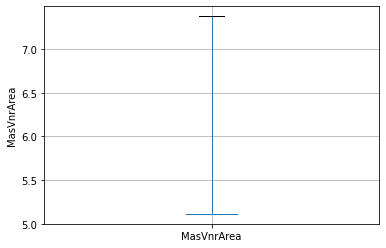

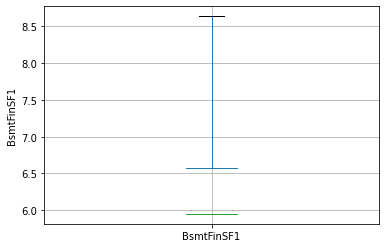

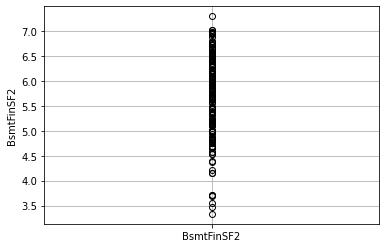

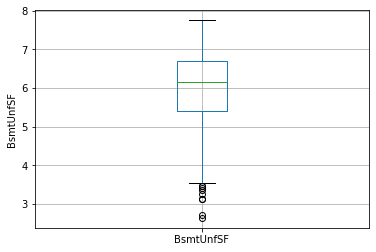

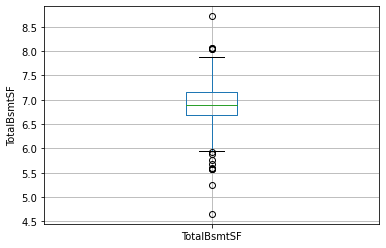

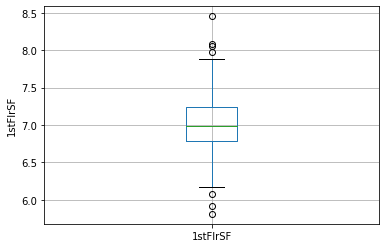

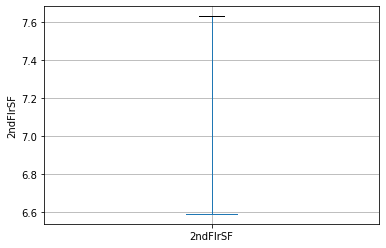

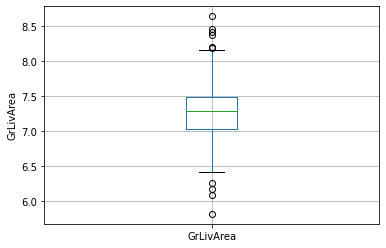

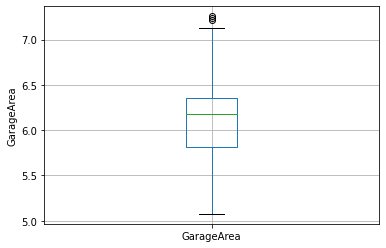

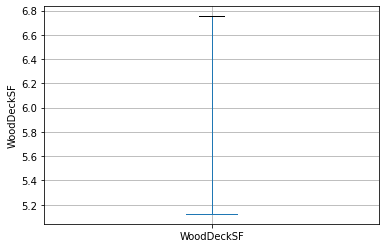

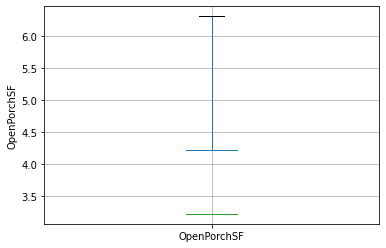

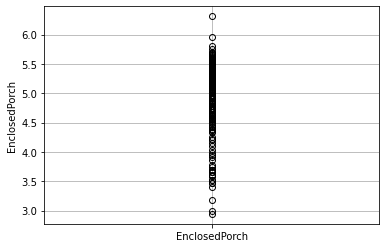

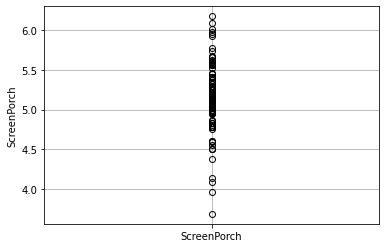

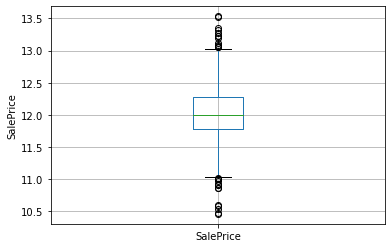

In [563]:
for feature in continuous_feature:
    df=data.copy()
    df[feature]=np.log(df[feature])
    df.boxplot(column=feature)
    plt.ylabel(feature)
    plt.show()

In [564]:
for feature in columns_object_type:
 print('The categorical feature is {} and  Unique values {}'.format(feature,len(data[feature].unique())))

The categorical feature is MSZoning and  Unique values 5
The categorical feature is Street and  Unique values 2
The categorical feature is Alley and  Unique values 3
The categorical feature is LotShape and  Unique values 4
The categorical feature is LandContour and  Unique values 4
The categorical feature is Utilities and  Unique values 2
The categorical feature is LotConfig and  Unique values 5
The categorical feature is LandSlope and  Unique values 3
The categorical feature is Neighborhood and  Unique values 25
The categorical feature is Condition1 and  Unique values 9
The categorical feature is Condition2 and  Unique values 8
The categorical feature is BldgType and  Unique values 5
The categorical feature is HouseStyle and  Unique values 8
The categorical feature is RoofStyle and  Unique values 6
The categorical feature is RoofMatl and  Unique values 8
The categorical feature is Exterior1st and  Unique values 15
The categorical feature is Exterior2nd and  Unique values 16
The catego

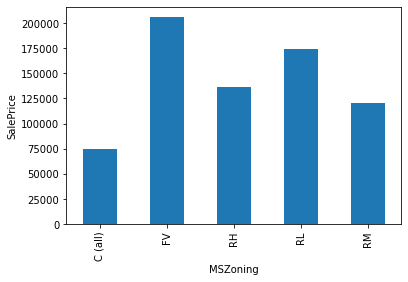

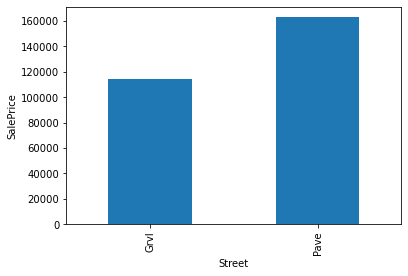

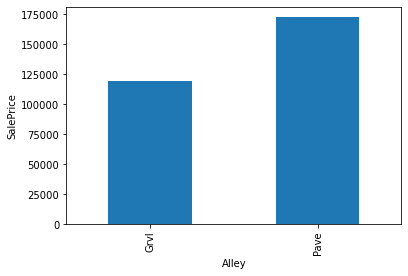

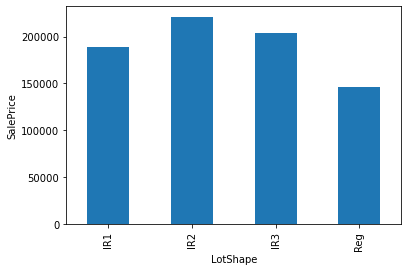

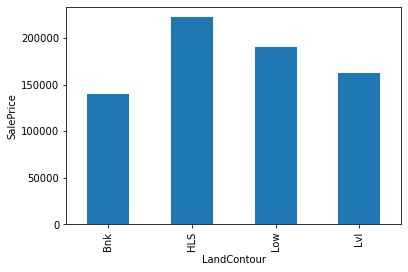

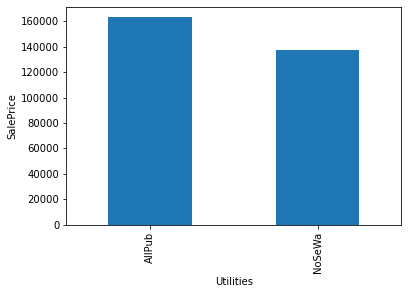

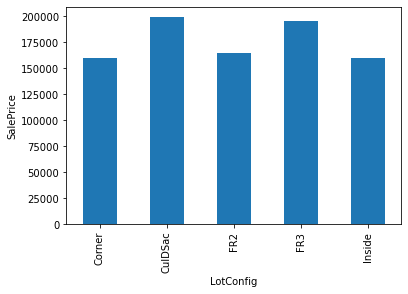

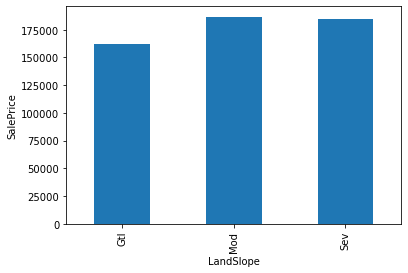

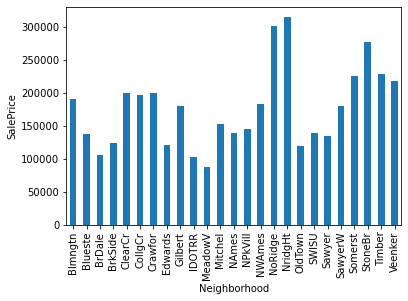

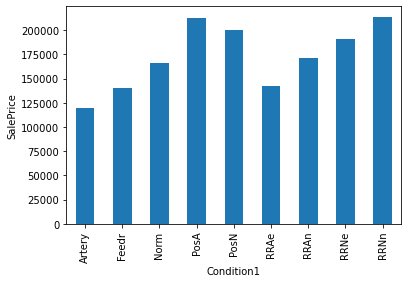

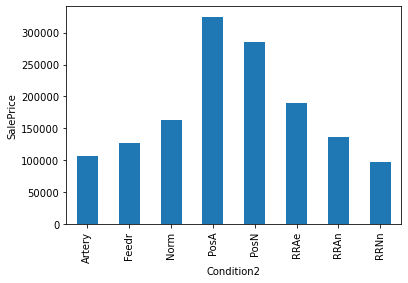

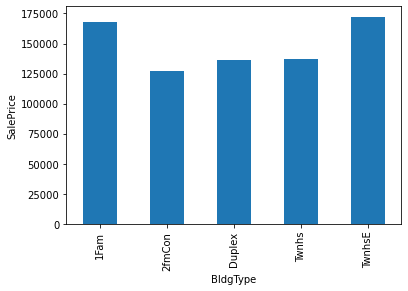

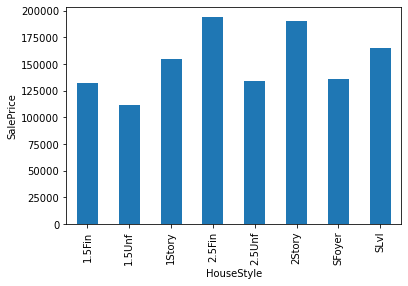

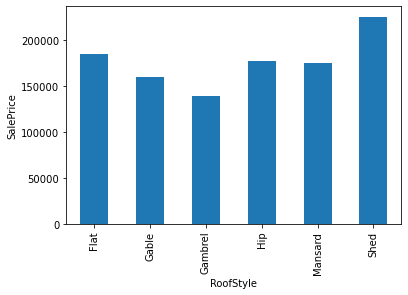

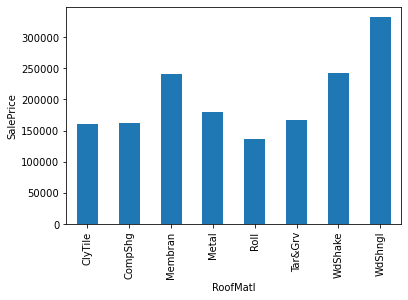

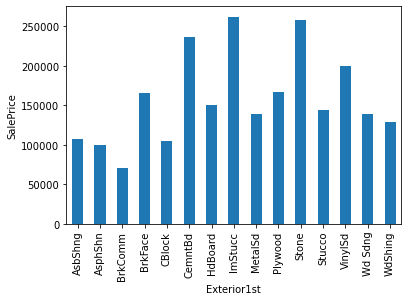

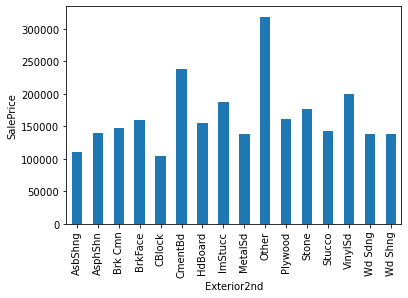

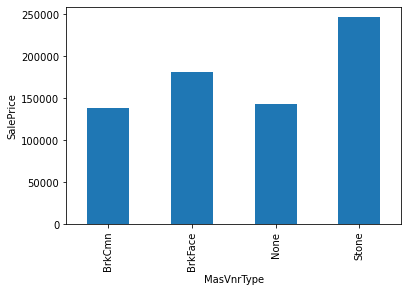

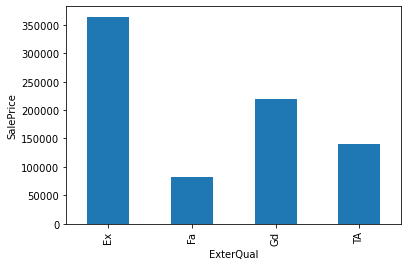

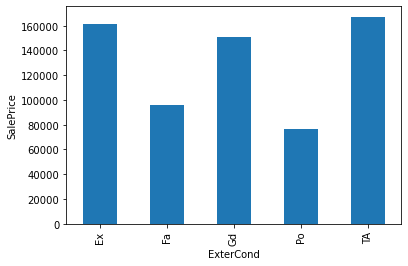

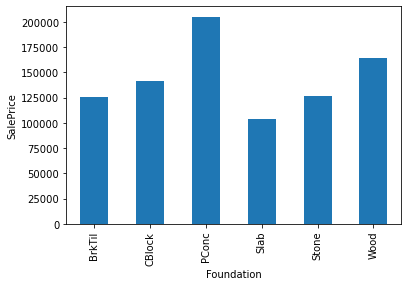

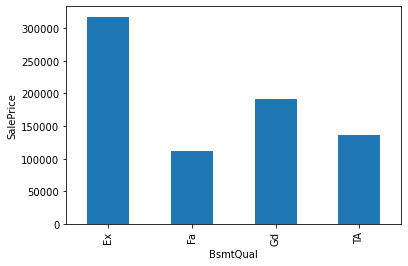

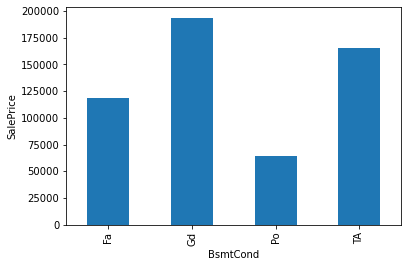

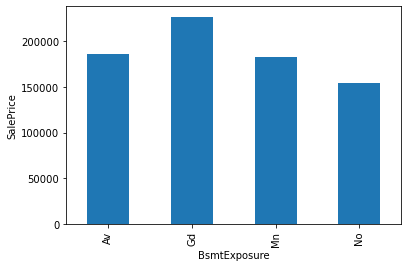

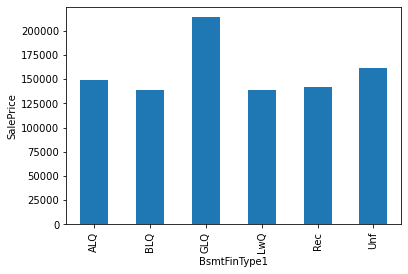

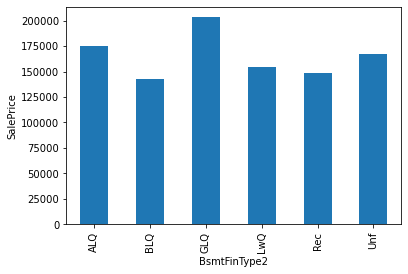

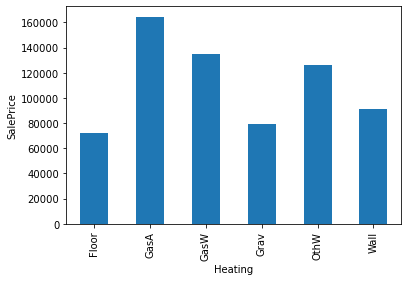

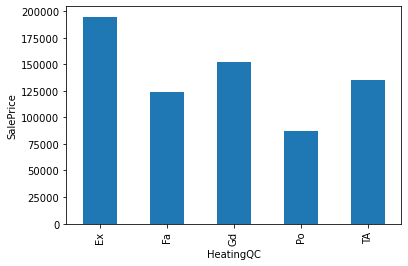

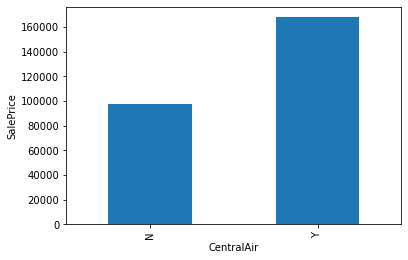

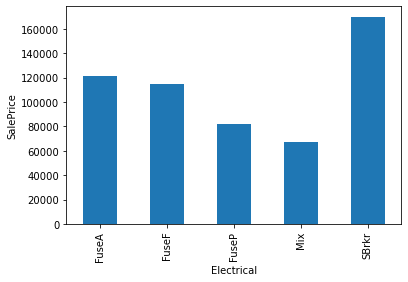

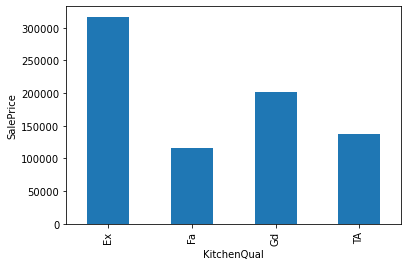

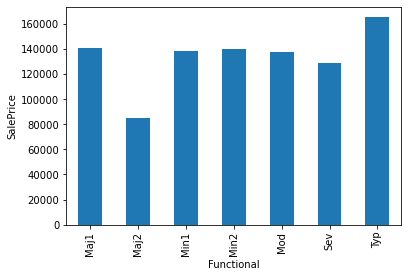

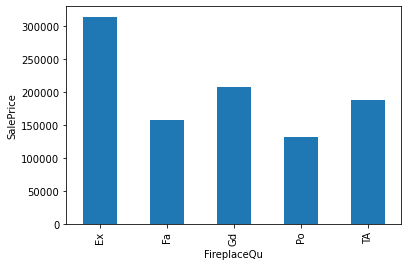

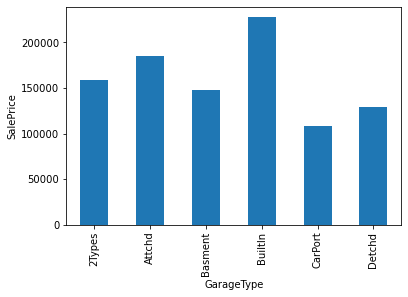

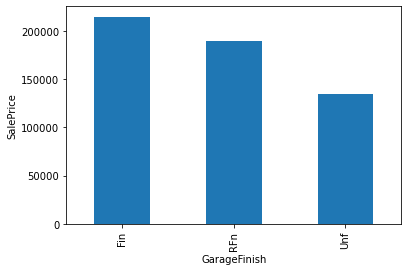

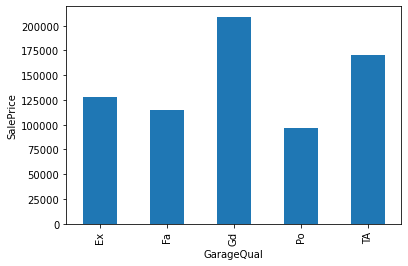

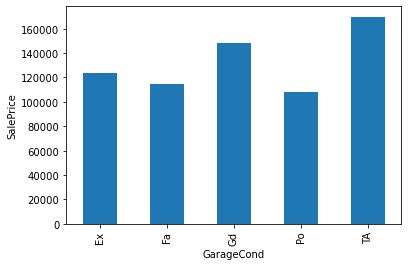

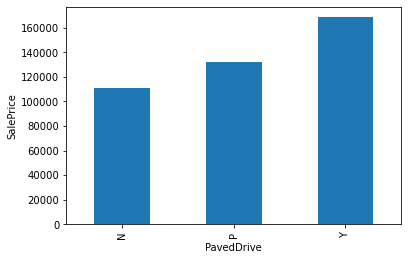

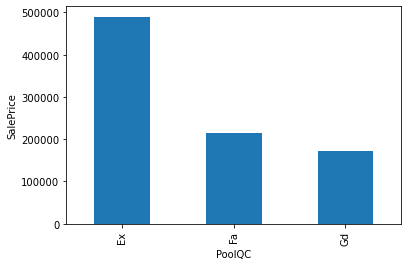

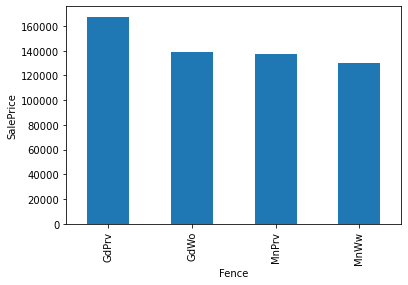

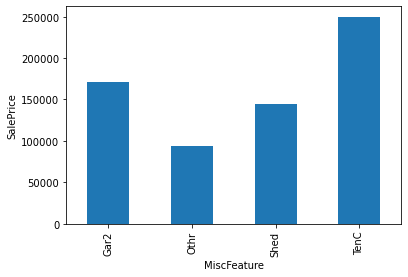

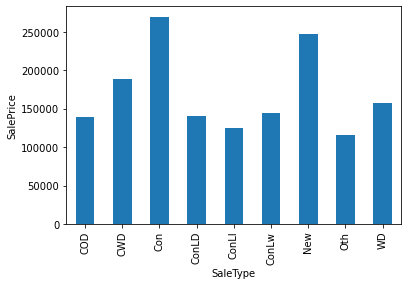

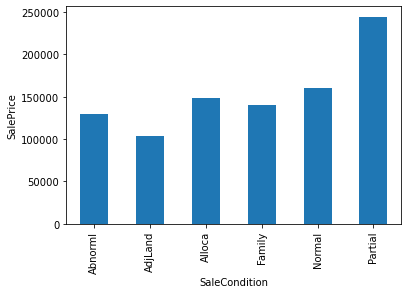

In [565]:
for feature in columns_object_type:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [566]:
categorical_nan=[feature for feature in columns_object_type if data[feature].isnull().sum()>1]

In [567]:
categorical_nan_test=[feature for feature in columns_object_type_test if data_test[feature].isnull().sum()>1]

In [568]:
columns_with_na_test

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [569]:
for feature in categorical_nan:
    print('The null % of null values in {} is {} '.format(feature,np.round(data[feature].isnull().mean(),2)*100))

The null % of null values in Alley is 94.0 
The null % of null values in MasVnrType is 1.0 
The null % of null values in BsmtQual is 3.0 
The null % of null values in BsmtCond is 3.0 
The null % of null values in BsmtExposure is 3.0 
The null % of null values in BsmtFinType1 is 3.0 
The null % of null values in BsmtFinType2 is 3.0 
The null % of null values in FireplaceQu is 47.0 
The null % of null values in GarageType is 6.0 
The null % of null values in GarageFinish is 6.0 
The null % of null values in GarageQual is 6.0 
The null % of null values in GarageCond is 6.0 
The null % of null values in PoolQC is 100.0 
The null % of null values in Fence is 81.0 
The null % of null values in MiscFeature is 96.0 


In [585]:
def replace_categoriacl_nan(data,feature):
    df=data.copy()
    df[feature]=df[feature].fillna('Missing')
    return df
data=replace_categoriacl_nan(data,columns_object_type)

In [588]:
data_test=replace_categoriacl_nan(data_test,columns_object_type)

In [572]:
data_test[categorical_nan_test].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [573]:
data[categorical_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [574]:
for feature in columns_num_type:
    print(feature,np.round(data[feature].isnull().mean(),2)*100, '% of missing values')

Id 0.0 % of missing values
MSSubClass 0.0 % of missing values
LotFrontage 18.0 % of missing values
LotArea 0.0 % of missing values
OverallQual 0.0 % of missing values
OverallCond 0.0 % of missing values
YearBuilt 0.0 % of missing values
YearRemodAdd 0.0 % of missing values
MasVnrArea 1.0 % of missing values
BsmtFinSF1 0.0 % of missing values
BsmtFinSF2 0.0 % of missing values
BsmtUnfSF 0.0 % of missing values
TotalBsmtSF 0.0 % of missing values
1stFlrSF 0.0 % of missing values
2ndFlrSF 0.0 % of missing values
LowQualFinSF 0.0 % of missing values
GrLivArea 0.0 % of missing values
BsmtFullBath 0.0 % of missing values
BsmtHalfBath 0.0 % of missing values
FullBath 0.0 % of missing values
HalfBath 0.0 % of missing values
BedroomAbvGr 0.0 % of missing values
KitchenAbvGr 0.0 % of missing values
TotRmsAbvGrd 0.0 % of missing values
Fireplaces 0.0 % of missing values
GarageYrBlt 6.0 % of missing values
GarageCars 0.0 % of missing values
GarageArea 0.0 % of missing values
WoodDeckSF 0.0 % of mi

In [575]:
numerical_nan=[feature for feature in columns_num_type if data[feature].isnull().sum()>1]

In [576]:
numerical_nan_test=[feature for feature in columns_num_type_test if data_test[feature].isnull().sum()>1]

In [578]:
def replace_numerical_nan(data,numerical_nan):
    
    for feature in numerical_nan:
        median_value=data[feature].median()
        data[feature].fillna(median_value,inplace=True)
    
   
replace_numerical_nan(data,numerical_nan)

In [579]:
replace_numerical_nan(data,numerical_nan_test)

In [580]:
for feature in features_with_date:
    if feature!='YrSold':
        data[feature]=data['YrSold']-data[feature]

In [581]:
features_with_date_test

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [583]:
for feature in features_with_date_test:
    if feature!='YrSold':
        data_test[feature]=data_test['YrSold']-data_test[feature]

In [586]:
from sklearn.preprocessing import LabelEncoder
for label in columns_object_type:
    le = LabelEncoder()   
    data[label]= le.fit_transform(data[label])

In [589]:
for label in columns_object_type_test:
    le = LabelEncoder()   
    data_test[label]= le.fit_transform(data_test[label])

In [590]:
scale_feature=[feature for feature in data.columns if feature not in ['Id','SalePrice']]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data[scale_feature])

MinMaxScaler()

In [595]:
scale_feature_test=[feature for feature in data.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data_test[scale_feature_test])

MinMaxScaler()

In [599]:
dataset = pd.concat([data[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[scale_feature]), columns=scale_feature)],
                    axis=1)

In [601]:
dataset_test = pd.concat([data_test[['Id']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data_test[scale_feature_test]), columns=scale_feature_test)],
                    axis=1)

In [319]:
dataset.to_csv('X_train.csv',index=False)

In [603]:
dataset_test.to_csv('X_train_test.csv',index=False)

In [604]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
pd.pandas.set_option('display.max_columns',None)

In [605]:
y_train=dataset[['SalePrice']]

In [606]:
x_train=dataset.drop(['Id','SalePrice'],axis=1)

In [623]:
x_test=dataset_test.drop(['Id'],axis=1)

In [618]:
feature_sel_model=SelectFromModel(Lasso(alpha=1000,random_state=0))
feature_sel_model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=1000, random_state=0))

In [ ]:
feature_sel_model=SelectFromModel(Lasso(alpha=1000,random_state=0))
feature_sel_model.fit(x_train,y_train)

In [619]:
feature_sel_model.get_support()

array([ True, False, False,  True, False, False,  True, False, False,
       False, False,  True, False, False,  True, False,  True, False,
       False,  True, False, False, False, False, False,  True,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [620]:
selected_features = x_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_features)))


total features: 79
selected features: 23


In [621]:
x_train=x_train[selected_features]

In [624]:
x_test=x_test[selected_features]